In [1]:
import gc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import astropy.constants as ct
import astropy.units as u

In [2]:
# you can direct pandas to the full output and it will load it
#COMPAS_OUTPUT_FOLDER = Path('..', 'Data', '2023_21XX_pulsar_proc_compas_output', 'COMPAS_1e2FeH=0.snappy.parquet')

In [3]:
# or to a smaller subsample, like the one I placed here
COMPAS_OUTPUT_FOLDER = Path('../data/2023_21XX_pulsar_proc_compas_output/COMPAS_1e2FeH=0.snappy.parquet')

**Note:** for the stellar type columns, NSs are identified as 13. 14 are BHs, 10-13 are WDs (He, CO, ONe). 15 is a massless remnant (SN left no remnant). Numbers below 11 identify giant and MS stages. These codes follow Hurley et al. (2000).

The code belows loads the entire sample, which includes *all* systems passed to '''COMPAS''' as an initial population, both ones that led to pulsar formation and ones that did not.

To load only pulsar-hosting systems, we can run

In [4]:
psr1_df = pd.read_parquet(path=COMPAS_OUTPUT_FOLDER,
                          engine='pyarrow',
                          filters=[('PSR_Type1', '==', 13.)],
                          use_threads=True)

psr2_df = pd.read_parquet(path=COMPAS_OUTPUT_FOLDER,
                          engine='pyarrow',
                          filters=[('PSR_Type2', '==', 13.)],
                          use_threads=True)

In [9]:
psr2_df

Metallicity_ZAMS  SemiMajorAxis_ZAMS  Coalescence_Time  \
0                 0.0142            0.072713               0.0   
1                 0.0142            0.072907               0.0   
2                 0.0142            0.073057               0.0   
3                 0.0142            0.073229               0.0   
4                 0.0142            0.073491               0.0   
...                  ...                 ...               ...   
451684            0.0142        20389.035156               0.0   
451685            0.0142        20435.839844               0.0   
451686            0.0142        20496.281250               0.0   
451687            0.0142        20566.066406               0.0   
451688            0.0142        20609.189453               0.0   

        Eccentricity_ZAMS      PSR_dT      PSR_Time  Unbound  Mass_Ratio_ZAMS  \
0                     0.0    0.143643    139.824249      1.0         0.495311   
1                     0.0    0.116694    127.783218      1.0         0.507332   
2                     0.0    0.106264    119.425758      1.0         0.516627   
3                     0.0    0.093203    112.153030      1.0         0.527355   
4                     0.0    0.077138    102.759491      1.0         0.543834   
...                   ...         ...           ...      ...              ...   
451684                0.0  500.000000   2118.523682      1.0         0.133287   
451685                0.0  500.000000   2117.099854      1.0         0.141110   
451686                0.0  500.000000   6615.566406      1.0         0.151264   
451687                0.0  500.000000   2114.144287      1.0         0.163064   
451688                0.0  500.000000  14113.402344      1.0         0.170395   

        PSR_MT_History  Mass_ZAMS2  ...  Total_Mass_PostSN  Total_Mass_ZAMS  \
0                  0.0    5.041182  ...           1.850558        15.218985   
1                  0.0    5.163522  ...           1.873313        15.341325   
2                  0.0    5.258129  ...           1.891101        15.435932   
3                  0.0    5.367311  ...           1.909059        15.545114   
4                  0.0    5.535039  ...           1.935797        15.712843   
...                ...         ...  ...                ...              ...   
451684             0.0   13.305210  ...          14.269176       113.128998   
451685             0.0   14.086092  ...          14.364039       113.909882   
451686             0.0   15.099768  ...          14.493904       114.923561   
451687             0.0   16.277626  ...          14.934055       116.101418   
451688             0.0   17.009497  ...          15.170486       116.833290   

        Mass_Ratio_PostSN  Binary_Type  PSR_Mass1  PSR_Mass2  PSR_Type1  \
0                0.448483       COWDNS   0.568721   1.277583        8.0   
1                0.466294       COWDNS   0.590080   1.277583        8.0   
2                0.480217       COWDNS   0.607705   1.277583        8.0   
3                0.494274       COWDNS   0.625293   1.277583        8.0   
4                0.515202       COWDNS   0.651562   1.277583        8.0   
...                   ...          ...        ...        ...        ...   
451684           0.112385         BHNS  12.827549   1.441626       14.0   
451685           0.119781         BHNS  12.827549   1.536490       14.0   
451686           0.129904         BHNS  12.827549   1.666355       14.0   
451687           0.164217         BHNS  12.827549   2.106506       14.0   
451688           0.182649         BHNS  12.827549   2.342937       14.0   

        PSR_Type2  Mass_ZAMS1  LogP_ZAMS  
0            13.0   10.177803  0.2763672  
1            13.0   10.177803  0.2763672  
2            13.0   10.177803  0.2763672  
3            13.0   10.177803  0.2763672  
4            13.0   10.177803  0.2763672  
...           ...         ...        ...  
451684       13.0    99.82379  7.9765625  
451685       13.0    99.82379  7.9765625  
45168

Where we load separately the systems with a primary NS and systems with a secondary NS. We avoid double-counting by always pulling the properties of primaries from '''psr1_df''' and of secondaries from '''psr2_df'''. This is not necessary for pulsar formed from isolated progenitors, but the sample of isolated systems is still to be run.

In [9]:
psr1_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710226 entries, 0 to 710225
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Metallicity_ZAMS    710226 non-null  float32 
 1   SemiMajorAxis_ZAMS  710226 non-null  float32 
 2   Coalescence_Time    710226 non-null  float32 
 3   Eccentricity_ZAMS   710226 non-null  float32 
 4   PSR_dT              710226 non-null  float32 
 5   PSR_Time            710226 non-null  float32 
 6   Unbound             710226 non-null  float32 
 7   Mass_Ratio_ZAMS     710226 non-null  float32 
 8   PSR_MT_History      710226 non-null  float32 
 9   Mass_ZAMS2          710226 non-null  float32 
 10  PSR_Pdot2           710030 non-null  float32 
 11  PSR_Omega1          692126 non-null  float32 
 12  Stellar_Type1       710226 non-null  int64   
 13  PSR_B2              710226 non-null  float32 
 14  PSR_SemiMajorAxis   710226 non-null  float32 
 15  PSR_Omega2       

In [10]:
psr2_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451689 entries, 0 to 451688
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Metallicity_ZAMS    451689 non-null  float32 
 1   SemiMajorAxis_ZAMS  451689 non-null  float32 
 2   Coalescence_Time    451689 non-null  float32 
 3   Eccentricity_ZAMS   451689 non-null  float32 
 4   PSR_dT              451689 non-null  float32 
 5   PSR_Time            451689 non-null  float32 
 6   Unbound             451689 non-null  float32 
 7   Mass_Ratio_ZAMS     451689 non-null  float32 
 8   PSR_MT_History      451689 non-null  float32 
 9   Mass_ZAMS2          451689 non-null  float32 
 10  PSR_Pdot2           427967 non-null  float32 
 11  PSR_Omega1          451313 non-null  float32 
 12  Stellar_Type1       451689 non-null  int64   
 13  PSR_B2              451689 non-null  float32 
 14  PSR_SemiMajorAxis   451689 non-null  float32 
 15  PSR_Omega2       

All columns labeled "PSR" were taken from COMPAS' ```BSE_Pulsar_Evolution``` output. They describe the state of the pulsar (and its orbit, if in a binary) at $t$ equal to ```PSR_Time``` since the start of the evolution (ZAMS). Columns not labeled "PSR" are taken from three other tables in the output: ```BSE_System_Parameters```, ```BSE_Supernovae``` and ```BSE_Double_Compact_Objects```.

Sanity checks. If there is a mismatch between PSR_Type1 and Stellar_Type1 in psr1_df (or PSR_Type2 and Stellar_Type2 in psr2_df), warn me (Lucas). This an issue with the cross-matching of tables ```BSE_Double_Compact_Objects``` and ```BSE_Pulsar_Evolution```.

In [10]:
psr1_df.PSR_Type1.value_counts()

PSR_Type1
13.0    710226
Name: count, dtype: int64

In [11]:
psr1_df.Stellar_Type1.value_counts()

Stellar_Type1
13    710101
14       125
Name: count, dtype: int64

In [12]:
psr2_df.PSR_Type2.value_counts()

PSR_Type2
13.0    451689
Name: count, dtype: int64

In [16]:
psr2_df.Stellar_Type2.value_counts()

Stellar_Type2
13    451689
Name: count, dtype: int64

We need just a few operations to recover $\dot{E}$, using

$$\dot{E}=4\pi^2 I\frac{\dot{P}}{P}.$$

In [17]:
ns_moment_inertia = 1e45 # gm cm2

In [18]:
def edot1(row):
    p = row.PSR_P1
    pdot = row.PSR_Pdot1
    edot1 = 4*np.pi*np.pi * ns_moment_inertia * pdot/p
    return edot1

In [19]:
psr1_df = psr1_df[psr1_df.PSR_Omega1 > 0]

In [20]:
psr1_df.PSR_Pdot1 = np.abs(psr1_df.PSR_Pdot1)

In [21]:
psr1_df['PSR_P1'] = 2*np.pi/psr1_df.PSR_Omega1

For now I had to implement the filter below in order to eliminate some completely aphysical systems (you can generate the graphs without apply the filter and see what I mean). I am not sure why these are showing up in the sample, but, looking at the COMPAS pulsar paper, they are likely not supposed to be there. We can keep manually removing them from the sample until I figure out where they are coming from.

In [38]:
psr1_df = psr1_df[(psr1_df.PSR_P1 > 5e-3) & (psr1_df.PSR_P1 < 1e10)]

In [39]:
psr1_df['PSR_logP1'] = np.log10(psr1_df.PSR_P1)
psr1_df['PSR_logPdot1'] = np.log10(psr1_df.PSR_Pdot1)
psr1_df['PSR_logB1'] = np.log10(psr1_df.PSR_B1)

Text(0.5, 0, '$\\log P_1\\,(\\mathrm{s})$')

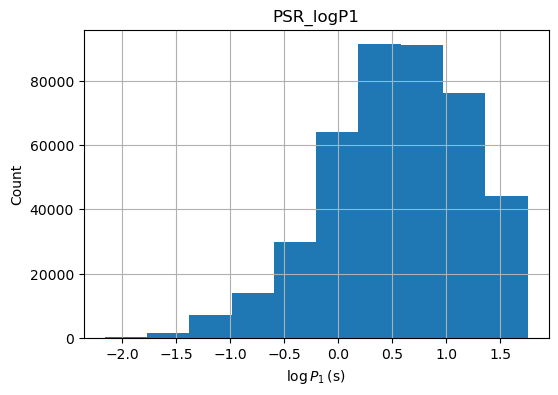

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
psr1_df.hist('PSR_logP1', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('$\log P_1\,(\mathrm{s})$')

Text(0.5, 0, '$\\log \\dot{P}_1\\,(\\mathrm{s}\\,\\mathrm{s}^{-1})$')

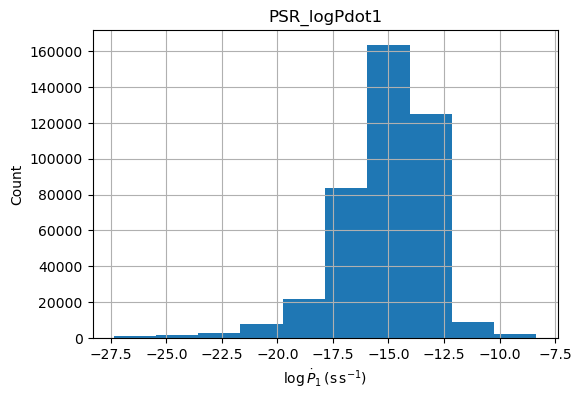

In [41]:
fig, ax = plt.subplots(figsize=(6,4))
psr1_df.hist('PSR_logPdot1', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('$\log \dot{P}_1\,(\mathrm{s}\,\mathrm{s}^{-1})$')

Text(0.5, 0, '$\\log B_1\\,(\\mathrm{G})$')

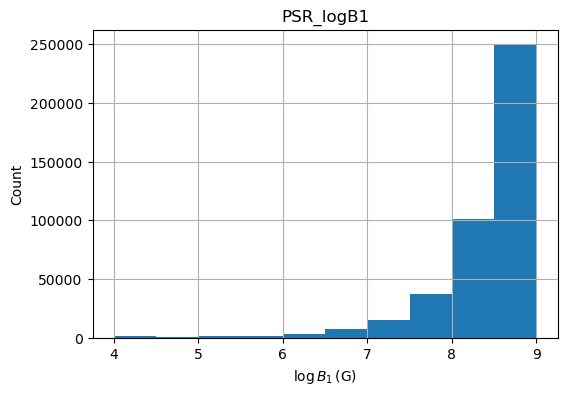

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
psr1_df.hist('PSR_logB1', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('$\log B_1\,(\mathrm{G})$')

In [43]:
psr1_df.describe()

Metallicity_ZAMS  SemiMajorAxis_ZAMS  Coalescence_Time  \
count       419207.0000       419207.000000      4.192070e+05   
mean             0.0142          995.135498      1.292795e+11   
std              0.0000         2181.661133      2.953758e+13   
min              0.0142            0.118953      0.000000e+00   
25%              0.0142            1.458603      0.000000e+00   
50%              0.0142           33.076496      0.000000e+00   
75%              0.0142          649.336670      0.000000e+00   
max              0.0142        13598.153320      1.150578e+16   

       Eccentricity_ZAMS        PSR_dT       PSR_Time        Unbound  \
count           419207.0  4.192070e+05  419207.000000  419207.000000   
mean                 0.0  4.408098e+00     390.093170       0.938794   
std                  0.0  4.405333e+01    1221.421265       0.239708   
min                  0.0  1.000000e-06       4.904715       0.000000   
25%                  0.0  4.002559e-03      19.407784       1.000000   
50%                  0.0  1.135669e-02      45.043186       1.000000   
75%                  0.0  5.237023e-02     153.297081       1.000000   
max                  0.0  5.000000e+02   14149.651367       1.000000   

       Mass_Ratio_ZAMS  PSR_MT_History     Mass_ZAMS2  ...      PSR_Mass2  \
count    419207.000000   419207.000000  419207.000000  ...  419207.000000   
mean          0.581246        0.001703       9.158546  ...       9.988726   
std           0.257216        0.064514       7.042520  ...       8.964192   
min           0.104140        0.000000       0.749950  ...       0.230264   
25%           0.363653        0.000000       4.400995  ...       4.264811   
50%           0.600016        0.000000       7.434354  ...       7.329995   
75%           0.810302        0.000000      11.657907  ...      12.041455   
max           0.999820        3.000000      61.499794  ...      97.889397   

       PSR_Type1      PSR_Type2         PSR_P1      PSR_logP1   PSR_logPdot1  \
count   419207.0  419207.000000  419207.000000  419207.000000  419207.000000   
mean        13.0       3.864714       8.425209       0.548664     -15.136228   
std          0.0       1.086034      10.797010       0.649590       2.129040   
min         13.0       1.000000       0.006934      -2.159005     -27.377758   
25%         13.0       4.000000       1.360072       0.133562     -16.166866   
50%         13.0       4.000000       3.864631       0.587108     -14.891623   
75%         13.0       4.000000      11.027882       1.042492     -13.673452   
max         13.0      14.000000      56.611217       1.752903      -8.339065   

           PSR_logB1     PSR_Edot1   PSR_logEdot1    PSR_logTime  
count  419207.000000  4.192070e+05  419207.000000  419207.000000  
mean        8.414085  2.013054e+36      30.911470       1.818936  
std         0.653441  4.264478e+37       2.677916       0.712407  
min         4.000353  2.968429e+17      17.472527       0.690614  
25%         8.240909  2.456711e+29      29.390354       1.287976  
50%         8.614304  1.319808e+31      31.120511       1.653629  
75%         8.828933  6.139273e+32      32.788117       2.185534  
max         8.999775  5.121145e+39      39.709367       4.150746  

[8 rows x 36 columns]

In [44]:
psr1_df['PSR_Edot1'] = psr1_df.apply(edot1, axis=1)

In [45]:
psr1_df['PSR_logEdot1'] = np.log10(psr1_df.PSR_Edot1)
psr1_df['PSR_logTime'] = np.log10(psr1_df.PSR_Time)

Text(0.5, 0, '$\\log \\dot{E}_1\\,(\\mathrm{erg}\\,\\mathrm{s}^{-1})$')

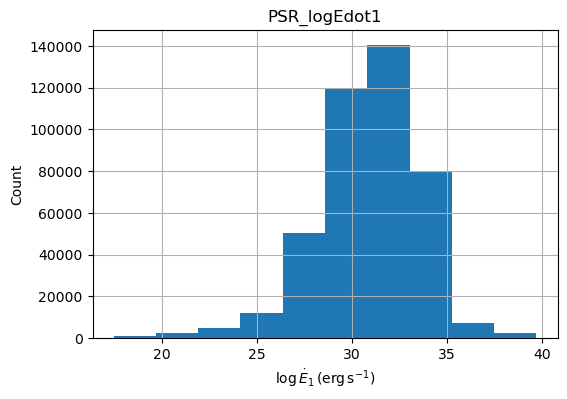

In [46]:
fig, ax = plt.subplots(figsize=(6,4))
psr1_df.hist('PSR_logEdot1', ax=ax)
ax.set_ylabel('Count')
ax.set_xlabel('$\log \dot{E}_1\,(\mathrm{erg}\,\mathrm{s}^{-1})$')

The "PSR_Time" column contains the total time passed since ZAMS up to the pulsar snapshot. I still need to set the Time at SN column to be saved in the output in order to be able to get the actual pulsar age.

Text(0, 0.5, 'Count')

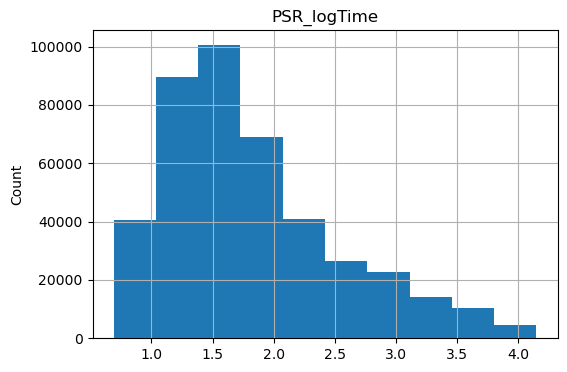

In [50]:
fig, ax = plt.subplots(figsize=(6,4))
psr1_df.hist('PSR_logTime', ax=ax)
ax.set_ylabel('Count')
#ax.set_xlabel(r'$\log \mathrm{Time}\,\mathrm{since}\,\mathrm{ZAMS}(\mathrm{Myr})})$')

The last PSR column is "PSR_MT_History",

In [51]:
mt_hist_dict = {0 : 'NO_MASS_TRANSFER',
               1 : 'STABLE_FROM_1_TO_2',
               2 : 'STABLE_FROM_2_TO_1',
               3 : 'CE_FROM_1_TO_2',  # CE: Common Envelope
               4 : 'CE_FROM_2_TO_1',
               5 : 'CE_DOUBLE_CORE',
               6 : 'CE_BOTH_MS',
               7 : 'CE_MS_WITH_CO'}

In [52]:
psr1_df.PSR_MT_History.value_counts()

PSR_MT_History
0.0    418895
2.0       174
3.0       114
1.0        24
Name: count, dtype: int64

array([[<Axes: title={'center': 'PSR_MT_History'}>]], dtype=object)

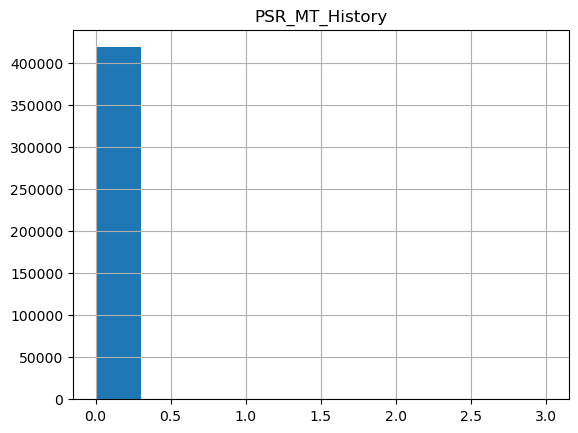

In [53]:
psr1_df.hist('PSR_MT_History')

Note that pulsars formed in binaries that never undergo mass transfer evolve as if they were isolated, per the COMPAS pulsar implementation paper (Chatotpadhyay et al. 2020). From the full documentation, it seems like pulsar evolution might not be turned on for single stellar evolution (I still need to check myself), but we should still be able to build a population of pulsars formed from single stellar evolution by using the non-interacting binaries.

## Other columns

The ```Unbound``` column allows us to find pulsars that were expelled from the binary after a SN.

array([[<Axes: title={'center': 'Unbound'}>]], dtype=object)

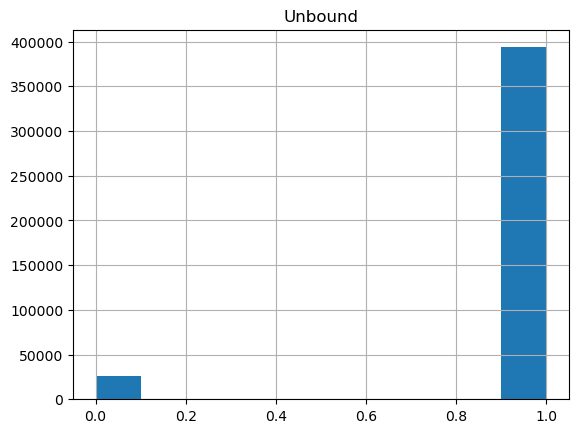

In [54]:
psr1_df.hist('Unbound')

<Axes: xlabel='PSR_logP1', ylabel='Density'>

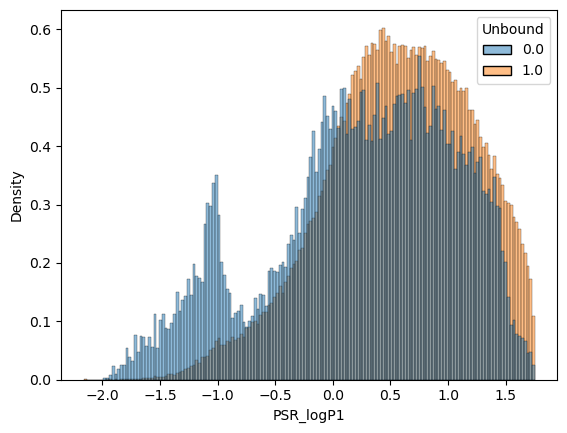

In [55]:
sns.histplot(data=psr1_df, x='PSR_logP1', hue='Unbound', stat='density', common_norm=False)

<Axes: xlabel='PSR_Mass1', ylabel='Density'>

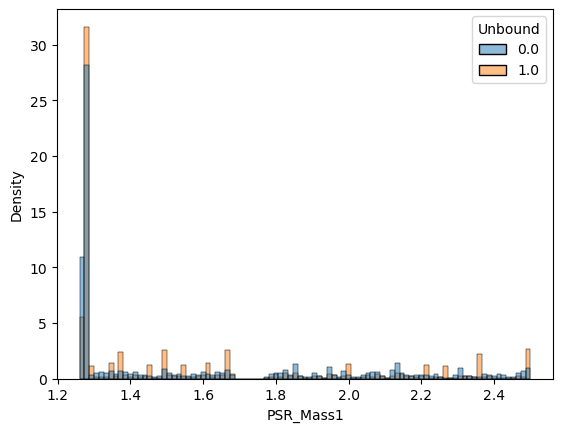

In [56]:
sns.histplot(data=psr1_df, x='PSR_Mass1', hue='Unbound', stat='density', common_norm=False)

Since these are still binaries, we also have access to the semi-major axis at the time of the snapshot. They are save in $R_\odot$, but $\mathrm{AU}$ are a more natural unit.

In [57]:
def a_rsun_to_au(row):
    a_rsun = row.PSR_SemiMajorAxis * u.Rsun
    a_au = a_rsun.to(u.au)
    return a_au.value

In [58]:
psr1_df.PSR_SemiMajorAxis = psr1_df.apply(a_rsun_to_au, axis=1)
psr1_df['PSR_logSemiMajorAxis'] = np.log10(psr1_df.PSR_SemiMajorAxis)

/home/wecapstor1/caph/mppi146h/software/miniforge3/envs/fermipy/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Count')

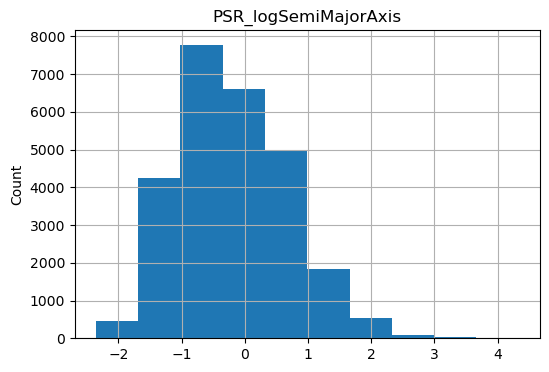

In [60]:
fig, ax = plt.subplots(figsize=(6,4))
psr1_df.hist('PSR_logSemiMajorAxis', ax=ax)
ax.set_ylabel('Count')
#ax.set_xlabel('$\log \mathrm{A}(\mathrm{AU})})$')

# Further steps

## About rotation

From the COMPAS methods paper,

> Most stars rotate sufficiently slow (refs.) for the impact of rotation to be modest. Rotation is expected to enhance mass loss rates [refs. therein], slightly increase main-sequence luminosities [refs. therein] and lifetimes [refs. therein], and lead to increased core masses [references therein]. On the other hand, very rapid rotation, especially coupled with significant tidal effects in very close binaries, can have a dramatic impact on the evolution of a star. Sufficiently rapid rotation can lead to enhanced mixing within a star, which may lead to chemically homogeneous evolution (Maeder 1987), where a star can burn almost all of its hydrogen into helium. The stellar tracks used in COMPAS are based on non-rotating stellar models (Pols et al. 1998). We do not account for the effects of mild rotation, but we do implement chemically homogeneous evolution (CHE) following the recipes of Riley et al. (2021).

The main point for us is that COMPAS does track spin to some extent, and I'm looking into getting that information in the output (check Extra columns section). For now I have been running all of my samples with CHE turned off, as this is the default setting, but we might want to discuss turning it on at some point; I do not know enough about CHE to lean a particular way at the moment, and in that case I tend to keep the default settings. The spin does not affect stellar evolution unless it reaches the CHE threshold and CHE is turned on, but as long as the spin is tracked up to the SN, we should be able to use it to infer a NS spin.

## Extra columns

After checking COMPAS' documentation, I noted down a few columns that are not yet being saved but might be of interest.

In ```BSE_Detailed_Output```,
* STAR_1_PROPERTY::OMEGA,
* STAR_2_PROPERTY::OMEGA, <br>
the documentation identifies OMEGA as the angular frequency, but I will have to check whether it stores the pre-SN value,
* STAR_1_PROPERTY::RADIUS,
* STAR_2_PROPERTY::RADIUS, <br>
again, I will need to look into the raw output to check whether it is the pre-SN radius,
* BINARY_PROPERTY::MASS_TRANSFER_TRACKER_HISTORY, <br>
COMPAS' pulsar evolution might only be turned on for binaries, even though the documentation states that pulsars that do not interact are evolved as isolated stars. I might have to use this column to select the subsample of stars in binaries that evolved as if they were isolated in order to build the population of pulsars that children of isolated progenitors. This property will be set to $0$ when no mass transfer has occured.

In ```BSE_Supernovae```,
* SUPERNOVA_PROPERTY::TOTAL_MASS_AT_COMPACT_OBJECT_FORMATION,
* SUPERNOVA_PROPERTY::CORE_MASS_AT_COMPACT_OBJECT_FORMATION,
* SUPERNOVA_PROPERTY::CO_CORE_MASS_AT_COMPACT_OBJECT_FORMATION,
* SUPERNOVA_PROPERTY::HE_CORE_MASS_AT_COMPACT_OBJECT_FORMATION, <br>
important for the birth pulsar properties,
* SUPERNOVA_PROPERTY::FALLBACK_FRACTION, <br>
could be important for birth pulsar properties as well,
* SUPERNOVA_PROPERTY::MASS_TRANSFER_DONOR_HISTORY <br>
this last property tracks at what stages of its life the star whose SN is being described transfered mass to its companion. For example, it will be 2-8 if it donated mass first as a Hertzprung Gap star (2) and later as a Helium Hertzprung Gap star (8). It should be empty if no mass transfer has occurred,
* SUPERNOVA_PROPERTY::SYSTEMIC_SPEED,
* SUPERNOVA_PROPERTY::KICK_MAGNITUDE, <br>
important when getting the spatial distribution of the sources.

My next steps will be to include these columns in the output settings and run a new sample with them. After that, I will check whether COMPAS applies the pulsar evolution module in its single stellar evolution mode, or if I have to extract the isolated population from the non-interacting binaries, which should be more (computationally) expensive but not too difficult to implement.

So it seems like we will be able to have the **mass, core mass, radius and spin** of the progenitor, but **not the magnetic field**. There is no mention at all of the magnetic field in the documentation, except for the pulsar field, which is drawn at birth. For the birth magnetic field distribution, Chattopadhyay et al. (2020) look at three options: a uniform distribution between $10^{10}$ and $10^{13}\,\mathrm{G}$; a log-uniform distribution in the same range; or a log-normal distribution with mean $12.65$ and standard deviation $0.55$. Only the last one receives a physical motivation, as it is the resulting fit by Faucher-Giguere & Kaspi (2006), who explicitly attempt to model the birth properties of pulsars (I have not read this paper yet). However, Chattopdhyay et al. (2020) found that it is their **FDM-20** model, which employs the **uniform** magnetic field distribution, that best fits the observed catalogued radio double NSs at the time.

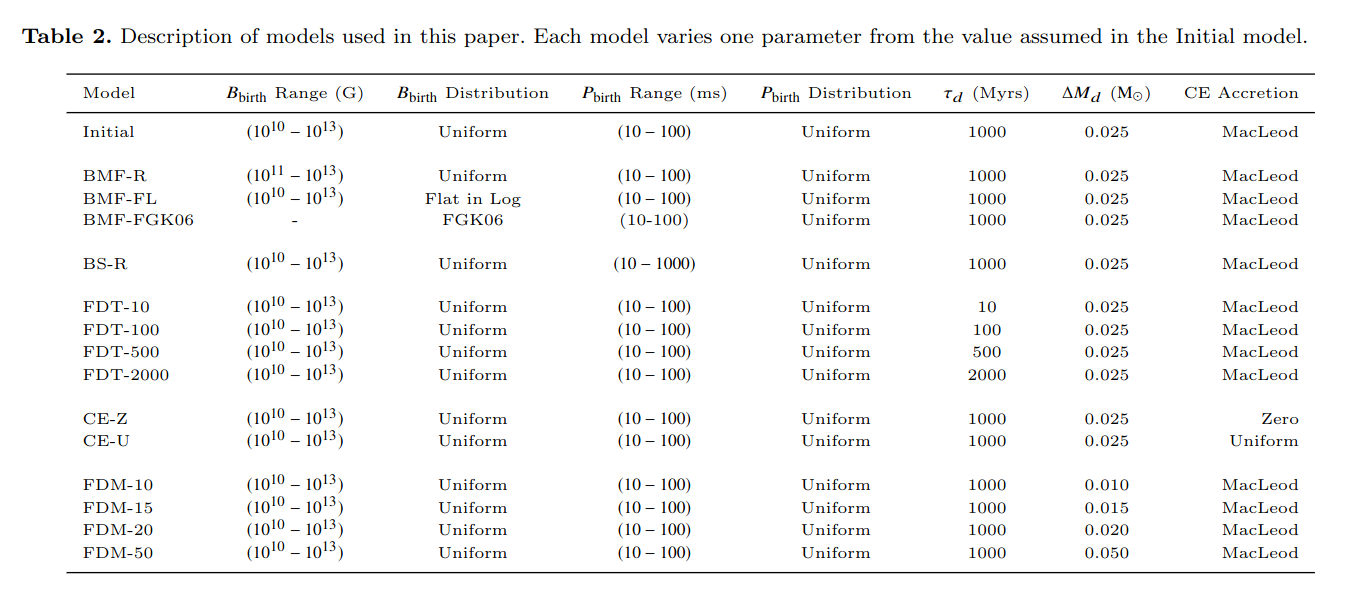

Model combinations from Chattopadhyay et al. (2020). $\tau_d$ is the field decay timescale, due to Ohmic dissipation (references therein); and $M_d$ the field decay masscale, due to burying of the surface magnetic field by accreted matter (references therein),

# References

[Chattopadhyay et al., 2020](https://arxiv.org/abs/1912.02415), *Modelling Double Neutron Stars: Radio and Gravitational Waves* (COMPAS pulsar methods paper) <br>
[Chattopadhayy et at., 2021](https://academic.oup.com/mnras/article-abstract/504/3/3682/6225810?redirectedFrom=fulltext&login=false), *Modelling neutron star–black hole binaries: future pulsar surveys and gravitational wave detectors* <br>
[Giacinti et al., 2020](https://www.aanda.org/articles/aa/full_html/2020/04/aa36505-19/aa36505-19.html), *Halo fraction in TeV-bright pulsar wind nebulae* <br>
[Faucher-Giguere & Kaspi, 2006](https://iopscience.iop.org/article/10.1086/501516), *Birth and Evolution of Isolated Radio Pulsars* <br>
[H.E.S.S. Collaboration: Abdalla et al., 2018](https://www.aanda.org/articles/aa/full_html/2018/04/aa29377-16/aa29377-16.html), *The population of TeV pulsar wind nebulae in the H.E.S.S. Galactic Plane Survey* <br>
[Maeder, 1987](https://articles.adsabs.harvard.edu/full/1987A%26A...178..159M), *Evidences for a bifurcation in massive star evolution. The ON-blue stragglers.* <br>
[Pols, 1998](https://academic.oup.com/mnras/article/298/2/525/1056616), *Stellar evolution models for Z = 0.0001 to 0.03* <br>
[Riley et al, 2021](https://academic.oup.com/mnras/article-abstract/505/1/663/6273653), *Chemically homogeneous evolution: a rapid population synthesis approach*]
[Team COMPAS: Riley et al., 2022](https://iopscience.iop.org/article/10.3847/1538-4365/ac416c), *Rapid Stellar and Binary Population Synthesis with COMPAS* (methods apper) <br>
[Team COMPAS](https://compas.readthedocs.io/en/latest/pages/Getting%20started/getting-started.html), *COMPAS Full Documentation* <br>